<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Demographics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

data = pd.read_csv("user-demographics.csv")

print(data.head())

   Town/City Country  Users  New users  Engaged sessions  Engagement rate  \
0  Hyderabad   India  75090      71123             81835         0.560468   
1  Bengaluru   India  74325      72162             84798         0.536459   
2    Chennai   India  54031      51207             55398         0.576372   
3     Mumbai   India  48323      45147             43751         0.483714   
4       Pune   India  44515      41678             45887         0.531401   

   Engaged sessions per user  Average engagement time  Event count  
0                   1.089826               132.499694       758313  
1                   1.140908               138.728988       776356  
2                   1.025300               120.585664       511249  
3                   0.905387               103.302547       422074  
4                   1.030821               119.913759       420101  


In [3]:
print(data.describe())

              Users     New users  Engaged sessions  Engagement rate  \
count   5000.000000   5000.000000       5000.000000      5000.000000   
mean     258.603400    239.222400        244.537000         0.523479   
std     2188.601568   2066.505792       2296.886373         0.121147   
min       12.000000      5.000000          0.000000         0.000000   
25%       19.000000     17.000000         15.000000         0.450525   
50%       33.000000     29.000000         28.000000         0.525000   
75%       84.000000     77.000000         73.000000         0.600000   
max    75090.000000  72162.000000      84798.000000         1.000000   

       Engaged sessions per user  Average engagement time    Event count  
count                5000.000000              5000.000000    5000.000000  
mean                    0.853167               101.298684    2276.547400  
std                     0.406458               173.481918   21224.330334  
min                     0.000000                 0.

<ipython-input-4-0c77b809e6ca>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities['Town/City'], x=top_cities['Users'], palette='viridis')


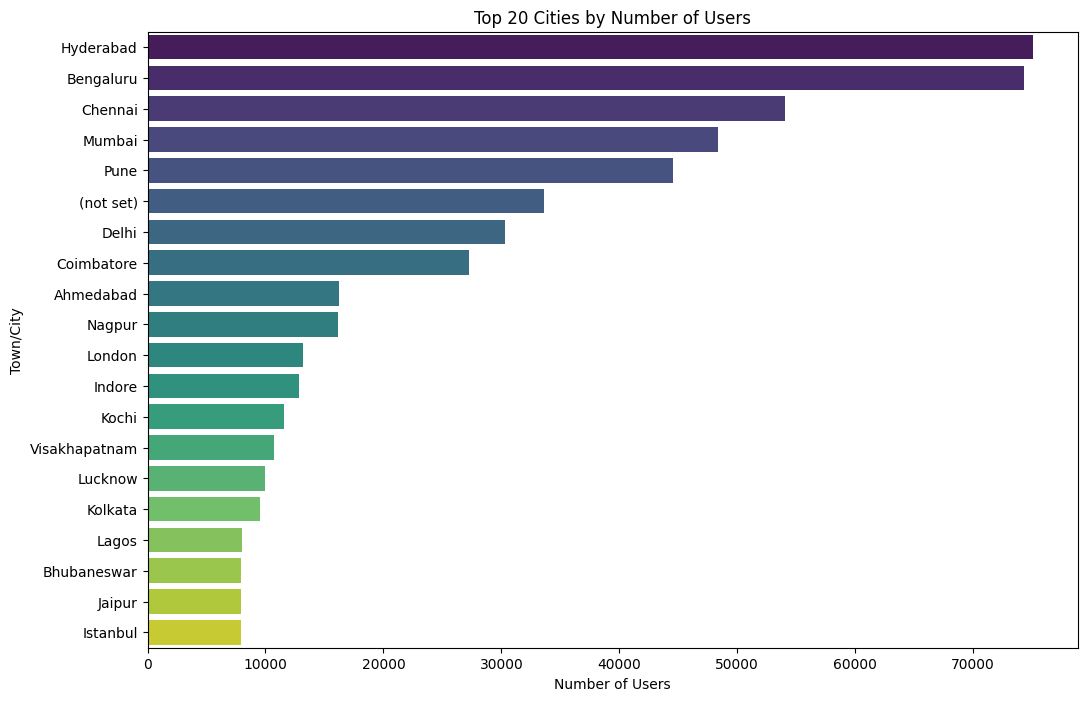

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

top_cities = data.sort_values(by='Users', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Users'], palette='viridis')
plt.xlabel('Number of Users')
plt.ylabel('Town/City')
plt.title('Top 20 Cities by Number of Users')
plt.show()

<ipython-input-5-3fed62f7439c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities['Town/City'], x=top_cities['Engagement rate'], palette='spring')


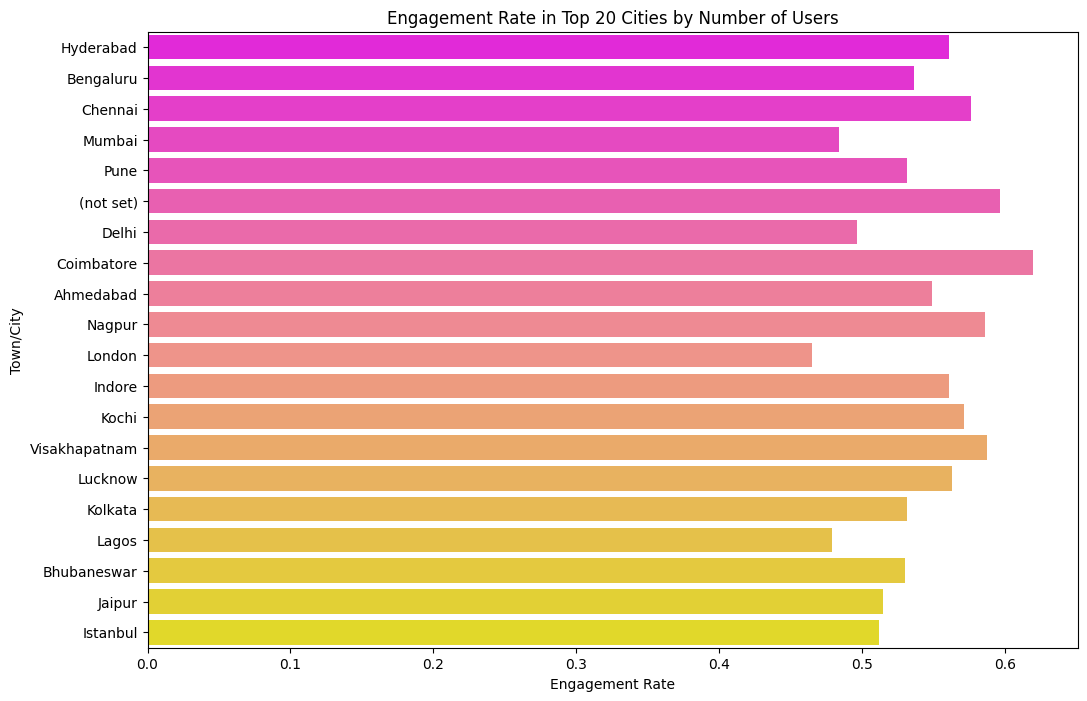

In [5]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Engagement rate'], palette='spring')
plt.xlabel('Engagement Rate')
plt.ylabel('Town/City')
plt.title('Engagement Rate in Top 20 Cities by Number of Users')
plt.show()

<ipython-input-6-18f6763f52bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities['Town/City'], x=top_cities['Engaged sessions per user'], palette='flare')


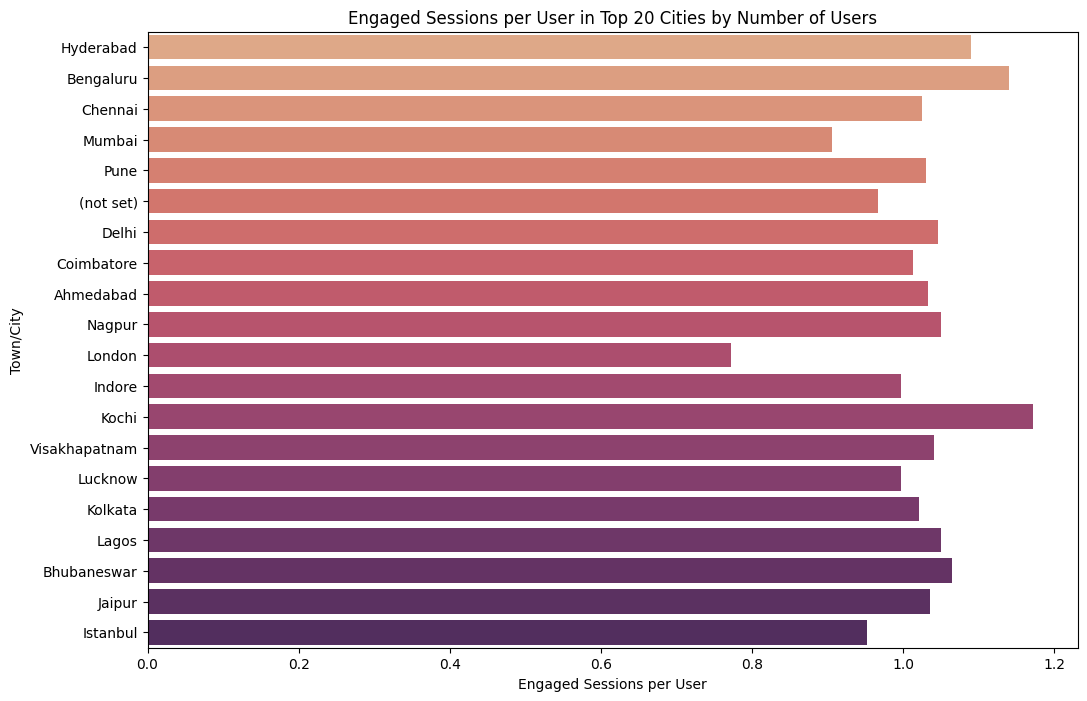

In [6]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Engaged sessions per user'], palette='flare')
plt.xlabel('Engaged Sessions per User')
plt.ylabel('Town/City')
plt.title('Engaged Sessions per User in Top 20 Cities by Number of Users')
plt.show()

<ipython-input-7-86b2da3d34d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities['Town/City'], x=top_cities['Average engagement time'], palette='crest')


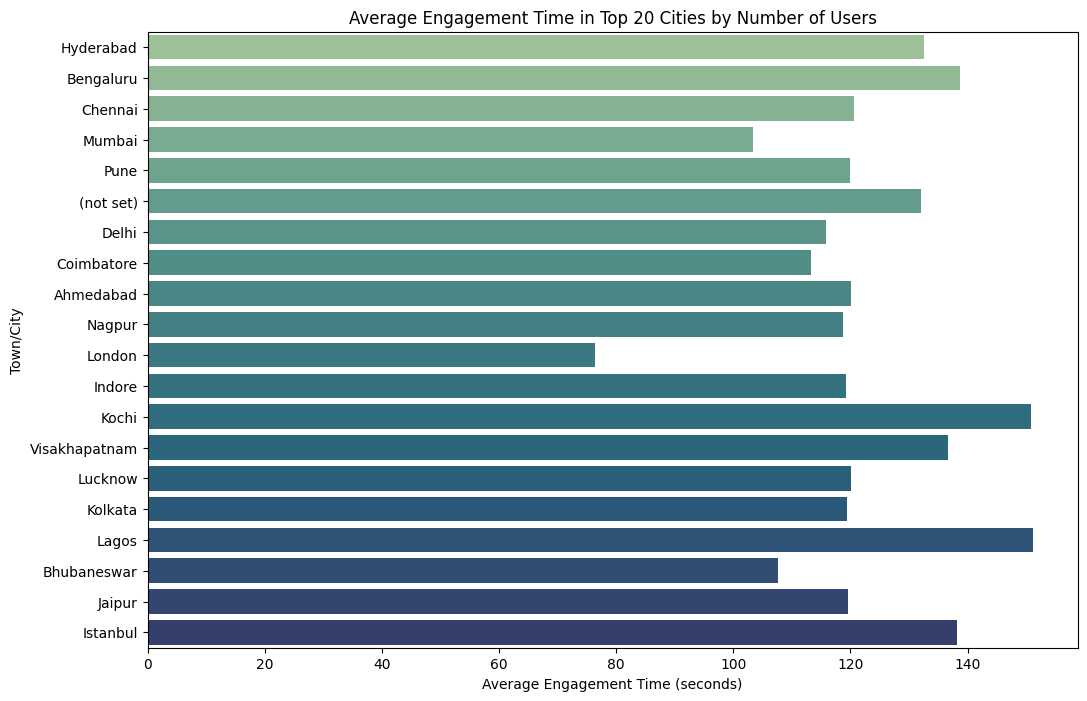

In [7]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Average engagement time'], palette='crest')
plt.xlabel('Average Engagement Time (seconds)')
plt.ylabel('Town/City')
plt.title('Average Engagement Time in Top 20 Cities by Number of Users')
plt.show()

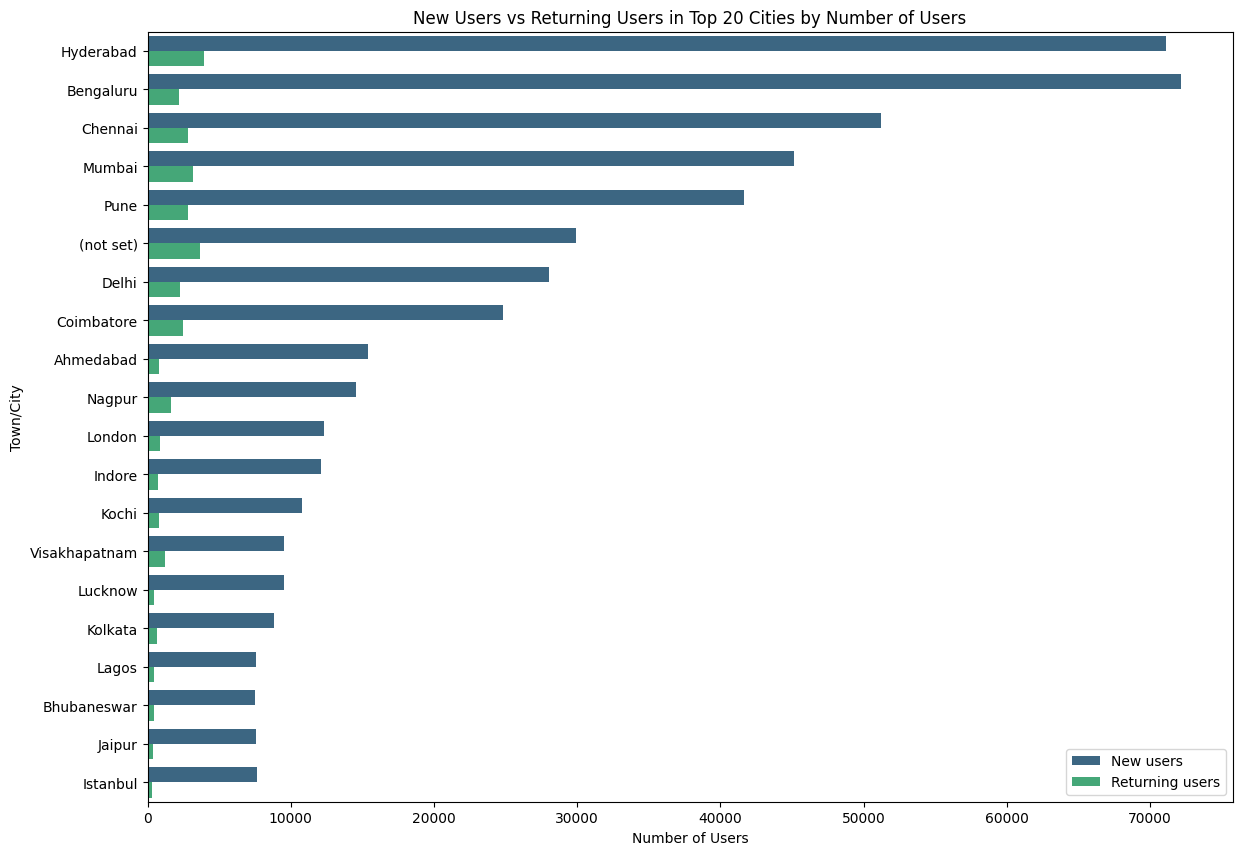

In [8]:
top_cities['Returning users'] = top_cities['Users'] - top_cities['New users']

top_cities_melted = top_cities.melt(id_vars='Town/City', value_vars=['New users', 'Returning users'],
                                    var_name='User Type', value_name='Count')

plt.figure(figsize=(14, 10))
sns.barplot(y='Town/City', x='Count', hue='User Type', data=top_cities_melted, palette='viridis')
plt.xlabel('Number of Users')
plt.ylabel('Town/City')
plt.title('New Users vs Returning Users in Top 20 Cities by Number of Users')
plt.legend()
plt.show()

<ipython-input-9-5df7a9eefeca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities['Town/City'], x=top_cities['Event count'], palette='magma')


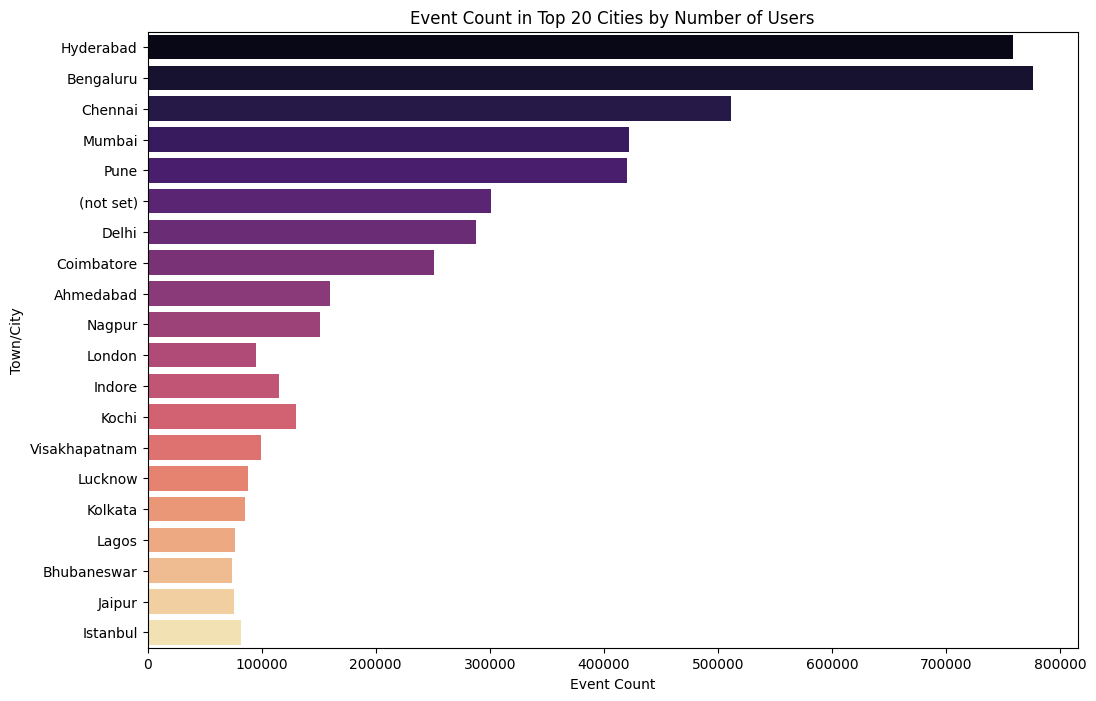

In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Event count'], palette='magma')
plt.xlabel('Event Count')
plt.ylabel('Town/City')
plt.title('Event Count in Top 20 Cities by Number of Users')
plt.show()

In [10]:
# high-Engagement Users
high_engagement_users = data[(data['Engaged sessions per user'] > data['Engaged sessions per user'].mean()) &
                             (data['Average engagement time'] > data['Average engagement time'].mean())]

# new Users
new_users = data[data['New users'] > (0.5 * data['Users'])]

# returning Users
returning_users = data[data['Users'] - data['New users'] > (0.5 * data['Users'])]

# categorize cities into high, medium, and low user count segments based on quantiles
user_quantiles = data['Users'].quantile([0.33, 0.67])
low_user_cities = data[data['Users'] <= user_quantiles[0.33]]
medium_user_cities = data[(data['Users'] > user_quantiles[0.33]) & (data['Users'] <= user_quantiles[0.67])]
high_user_cities = data[data['Users'] > user_quantiles[0.67]]

# summary of segments
segments_summary = {
    "High Engagement Users": len(high_engagement_users),
    "New Users": len(new_users),
    "Returning Users": len(returning_users),
    "Low User Cities": len(low_user_cities),
    "Medium User Cities": len(medium_user_cities),
    "High User Cities": len(high_user_cities)
}

segments_summary

{'High Engagement Users': 1383,
 'New Users': 4975,
 'Returning Users': 17,
 'Low User Cities': 1687,
 'Medium User Cities': 1676,
 'High User Cities': 1637}